In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import json
import math

In [138]:
df = pd.read_csv("../data/mb_problem_holds.csv")

In [139]:
print(df.columns)
#print(df['Holdsetup'])
print(df['Moves'][0])

Index(['Method', 'Name', 'Grade', 'UserGrade', 'MoonBoardConfiguration',
       'MoonBoardConfigurationId', 'Setter', 'FirstAscender', 'Rating',
       'UserRating', 'Repeats', 'Attempts', 'Holdsetup', 'IsBenchmark',
       'IsMaster', 'IsAssessmentProblem', 'ProblemType', 'Moves', 'Holdsets',
       'Locations', 'RepeatText', 'NumberOfTries', 'NameForUrl', 'Upgraded',
       'Downgraded', 'Id', 'ApiId', 'DateInserted', 'DateUpdated',
       'DateDeleted', 'DateTimeString'],
      dtype='object')
[{'Id': 1542554, 'Description': 'J5', 'IsStart': True, 'IsEnd': False}, {'Id': 1542555, 'Description': 'I9', 'IsStart': False, 'IsEnd': False}, {'Id': 1542556, 'Description': 'E14', 'IsStart': False, 'IsEnd': False}, {'Id': 1542557, 'Description': 'H18', 'IsStart': False, 'IsEnd': True}]


In [140]:
hold_count = {}
problems = df['Moves']
for problem in problems:
    problem = problem.replace("'", '"')
    problem = problem.replace("True", 'true')
    problem = problem.replace("False", 'false')
    problem = json.loads(problem)
    for hold in problem:
        pos = hold['Description'] 
        pos = pos[0].upper() + pos[1:]
        if pos in hold_count:
            hold_count[pos] += 1
        else:
            hold_count[pos] = 1

print(hold_count)

{'J5': 65, 'I9': 17, 'E14': 32, 'H18': 34, 'K6': 10, 'K7': 8, 'D10': 40, 'H14': 30, 'A16': 6, 'A18': 49, 'D3': 35, 'B4': 36, 'G7': 18, 'I8': 13, 'K12': 9, 'H15': 7, 'C18': 46, 'E6': 46, 'G2': 44, 'J6': 4, 'F8': 11, 'J12': 7, 'F15': 51, 'F16': 3, 'H7': 9, 'K8': 10, 'K10': 7, 'K13': 1, 'G16': 10, 'I4': 21, 'E7': 27, 'F12': 19, 'D13': 19, 'I15': 19, 'I18': 67, 'G14': 35, 'A12': 7, 'D6': 25, 'F9': 24, 'H9': 26, 'E16': 46, 'F10': 39, 'F6': 14, 'K5': 65, 'K18': 49, 'A5': 47, 'C7': 29, 'F11': 55, 'K11': 12, 'J14': 12, 'E13': 51, 'H12': 47, 'J2': 23, 'K9': 15, 'G11': 27, 'C12': 13, 'D18': 114, 'H8': 33, 'I14': 47, 'D15': 44, 'A15': 1, 'E18': 82, 'I6': 17, 'C14': 15, 'G18': 81, 'H11': 37, 'B12': 11, 'D8': 23, 'F5': 107, 'F7': 25, 'D17': 25, 'C5': 45, 'E9': 21, 'D11': 14, 'G17': 30, 'E10': 41, 'D7': 3, 'I11': 20, 'A14': 25, 'B9': 17, 'B3': 34, 'D5': 14, 'B18': 27, 'B13': 7, 'E8': 70, 'C11': 6, 'I13': 19, 'C15': 22, 'E12': 66, 'F14': 58, 'B16': 20, 'B10': 14, 'A9': 27, 'I5': 32, 'C9': 18, 'B6': 1

In [141]:
xdim = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11}
ydim = [i for i in range(19, 0, -1)]
# print(xdim)
# print(ydim)
def get_hold_coords(hold, xdim = xdim, ydim = ydim):
    col = xdim[hold[0]] -1
    row = ydim[int(hold[1:])] - 1
    return (row, col)

hold_positions = {}
for pos in hold_count.keys():
    hold_positions[pos] = get_hold_coords(pos, xdim, ydim)

print(hold_positions)

{'J5': (13, 9), 'I9': (9, 8), 'E14': (4, 4), 'H18': (0, 7), 'K6': (12, 10), 'K7': (11, 10), 'D10': (8, 3), 'H14': (4, 7), 'A16': (2, 0), 'A18': (0, 0), 'D3': (15, 3), 'B4': (14, 1), 'G7': (11, 6), 'I8': (10, 8), 'K12': (6, 10), 'H15': (3, 7), 'C18': (0, 2), 'E6': (12, 4), 'G2': (16, 6), 'J6': (12, 9), 'F8': (10, 5), 'J12': (6, 9), 'F15': (3, 5), 'F16': (2, 5), 'H7': (11, 7), 'K8': (10, 10), 'K10': (8, 10), 'K13': (5, 10), 'G16': (2, 6), 'I4': (14, 8), 'E7': (11, 4), 'F12': (6, 5), 'D13': (5, 3), 'I15': (3, 8), 'I18': (0, 8), 'G14': (4, 6), 'A12': (6, 0), 'D6': (12, 3), 'F9': (9, 5), 'H9': (9, 7), 'E16': (2, 4), 'F10': (8, 5), 'F6': (12, 5), 'K5': (13, 10), 'K18': (0, 10), 'A5': (13, 0), 'C7': (11, 2), 'F11': (7, 5), 'K11': (7, 10), 'J14': (4, 9), 'E13': (5, 4), 'H12': (6, 7), 'J2': (16, 9), 'K9': (9, 10), 'G11': (7, 6), 'C12': (6, 2), 'D18': (0, 3), 'H8': (10, 7), 'I14': (4, 8), 'D15': (3, 3), 'A15': (3, 0), 'E18': (0, 4), 'I6': (12, 8), 'C14': (4, 2), 'G18': (0, 6), 'H11': (7, 7), 'B1

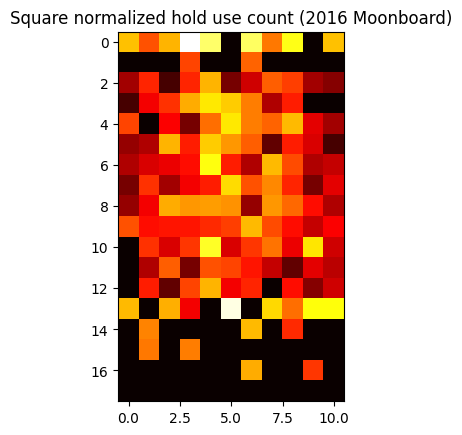

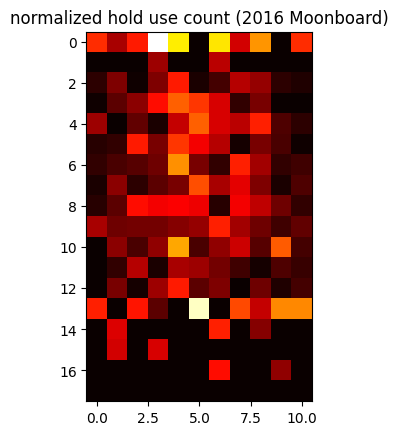

In [142]:
def hold_use_count_2d(dimensions, hold_count, hold_positions, ):
    """
    Outputs a 2d numpy array with the hold use count
    Args:
        Dimensions (tuple(int)): two-tuple with the hight and width of board

        hold_count (dict(str: int)): key is alphanumeric position on board, 
                                   value is number of times hold appears in the dataset

        hold_positions(dict(str: tuple(int, int))): key is alphanumeric position on board
                                                    value is numeric row and col from top left of board
    Returns:
        np.2darray(floats): normalized hold use heatmap
    """

    use_count = np.zeros(dimensions)
    for h in hold_count:
        pos = hold_positions[h]
        use_count[pos[0]][pos[1]] = hold_count[h]
    #normalize_use = use_count / use_count.max()
    return use_count


use_array = hold_use_count_2d((18, 11), hold_count, hold_positions)

#square normalized count
normalized1 = np.sqrt(use_array)
plt.imshow(normalized1, cmap='hot', interpolation='nearest')
plt.title("Square normalized hold use count (2016 Moonboard)")
plt.show()

#non-normalized count
normalized2 = use_array
plt.imshow(normalized2, cmap='hot', interpolation='nearest')
plt.title("normalized hold use count (2016 Moonboard)")
plt.show()



In [143]:
#function to find distance between holds
def hold_distance(h1, h2):
    """
    Returns distance in milimeters between two hold

    Args:
        h1 (tuple(int, int)): hold coordinate
        h2 (tuple(int, int)): hold coordinate
    Return:
        int: euclidean distance between holds.
    """
    return np.sqrt(np.power(h1[0]- h2[0], 2) + np.power(h1[1]- h2[1], 2))



In [144]:
problem_hold_dict = {}
problems = df['Moves']
for problem in problems:
    problem = problem.replace("'", '"')
    problem = problem.replace("True", 'true')
    problem = problem.replace("False", 'false')
    problem = json.loads(problem)
    #print(problem)
    holds = {}
    for hold in problem:
        pos = hold['Description'] 
        pos = pos[0].upper() + pos[1:]
        Start_or_end = hold['IsStart'] or hold['IsEnd']
        holds[pos] = Start_or_end
    min_hold_distances = []    
    for h1 in holds:
        h1_coords = get_hold_coords(h1)
        min_distance = math.inf
        for h2 in holds:
            if h1 == h2:
                continue
            h2_coords = get_hold_coords(h2)
            d = hold_distance(h1_coords, h2_coords)
            min_distance = min(min_distance, d)
        min_hold_distances.append(min_distance)
    



            


        
